# TensorFlow 2 & MLflow quickstart

## Welcome to PrimeHub!

In this quickstart, we will perfome following actions to train, manage, and deploy the model: 

1. Train a neural network that classifies images with <a target="_blank" href="https://www.mlflow.org/docs/latest/python_api/mlflow.tensorflow.html#mlflow.tensorflow.autolog">MLflow autologging API</a> enabled.
1. Register the trained model to PrimeHub <a target="_blank" href="https://docs.primehub.io/docs/model-management">Model Management</a>.
1. Deploy the managed model on PrimeHub <a target="_blank" href="https://docs.primehub.io/docs/model-deployment-feature">Model Deployments</a>.
1. Test deployed model.
1. (Advanced) Use PrimeHub <a target="_blank" href="https://github.com/InfuseAI/primehub-python-sdk">Python SDK</a> to deploy the trained model.

### Prerequisites
1. Enable <a target="_blank" href="https://docs.primehub.io/docs/model-management">Model Management</a>.
1. Enable <a target="_blank" href="https://docs.primehub.io/docs/model-deployment-feature">Model Deployments</a>.

**Contact your admin if any prerequisite is not enabled yet.**

## 1. Train a neural network that classifies images with <a target="_blank" href="https://www.mlflow.org/docs/latest/python_api/mlflow.tensorflow.html#mlflow.tensorflow.autolog">MLflow autologging API</a> enabled

Firstly, let's import libraries.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
import mlflow

Set the experiment name so the execution of this notebook will be associated with `tensorflow2-quickstart` experiment. Also, enable the `MLflow autologging` to record parameters, metrics, and models automatically.


In [2]:
mlflow.set_experiment("tensorflow2-quickstart")
mlflow.tensorflow.autolog()

Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers.

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Build the `tf.keras.Sequential` model by stacking layers.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Choose an optimizer, loss function, and metrics function.

In [5]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = 'adam'
metrics = ['accuracy']

Compile the model.

In [6]:
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

The `Model.fit` method adjusts the model parameters to minimize the loss.

In [7]:
model.fit(x_train, y_train, epochs=3)

2021/09/23 10:03:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '124c550d8e7a452182b8f697e241fbaf', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5829 - accuracy: 0.8964
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5241 - accuracy: 0.9424
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5097 - accuracy: 0.9560
INFO:tensorflow:Assets written to: /tmp/tmpna59s4ur/model/data/model/assets


The `Model.evaluate` method checks the models performance.

In [8]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.5022 - accuracy: 0.9616


[1.5022213459014893, 0.9616000056266785]

## 2. Register the trained model to PrimeHub <a target="_blank" href="https://docs.primehub.io/docs/model-management">Model Management</a>

Now, we've trained the model and it should be automatically exported to MLflow server.
Next, back to PrimeHub and select `Models`.

<img src="img/mlflow/2-1-menu.png"/>

In the models page, click on the `MLflow UI` button.

<img src="img/mlflow/2-2-model-list.png"/>

In the `MLflow UI`, switch to `Experiments` tab.

<img src="img/mlflow/2-3-mlflow-ui.png"/>

Select our specified experiment name `tensorflow2-quickstart`.

<img src="img/mlflow/2-4-experiment.png"/>

It shows all runs in `tensorflow2-quickstart` experiment, now click on our executed run.

<img src="img/mlflow/2-5-run-list.png"/>

Both parameters, metrics, and artifacts can be found in this page.

<img src="img/mlflow/2-6-run-info.png"/>

Scroll down to the `Artifacts` section. Click on the exported `model` and `Register Model` button.

<img src="img/mlflow/2-7-artifacts.png"/>

In the model selector, choose the `Create New Model`.

<img src="img/mlflow/2-8-register-model.png"/>

Fill in the [Model Name] field with [tf2-quickstart] and click on `Register` button.

<img src="img/mlflow/2-9-register-model.png"/>

We can see our model is successfully registered as version `1`.

<img src="img/mlflow/2-10-registered.png"/>

Back and refresh the models page in the PrimeHub UI, now we can see our model `tf2-quickstart` is managed in model list.

<img src="img/mlflow/2-11-model-list.png"/>

## 3. Deploy the managed model on PrimeHub <a target="_blank" href="https://docs.primehub.io/docs/model-deployment-feature">Model Deployments</a>

Next, click on our managed model name `tf2-quickstart`.

<img src="img/mlflow/2-11-model-list.png"/>

It shows all versions of `tf2-quickstart` model, let's click on the `Deploy` button of `Version 1`.

<img src="img/mlflow/3-1-version-list.png"/>

In the deployment selector, choose the `Create new deployment` and click on `OK` button.

<img src="img/mlflow/3-2-new-deployment.png"/>

We will be directed to `Create Deployment` page. And the `Model URI` field will be auto fill-in with registered model scheme (`models:/tf2-quickstart/1`).

<img src="img/mlflow/3-3-model-uri.png"/>

Next,
1. Fill in the [Deployment Name] field with [tf2-quickstart].
1. Select the [Model Image] field with [TensorFlow2 server]; this is a pre-packaged model server image that can serve TensorFlow 2 model.

<img src="img/mlflow/3-4-name-model-image.png"/>

Choose the Instance Type, the minimal requirements in this quickstart is `CPU: 0.5 / Memory: 1 G / GPU: 0`.

<img src="img/mlflow/3-5-resource.png"/>

Then, click on `Deploy` button.

Our model is deploying, let's click on the `Manage` button of `tf2-quickstart` deployment cell.

<img src="img/mlflow/3-6-deployment-list.png"/>

In the deployment detail page, we can see the `Status` is `Deploying`.

<img src="img/mlflow/3-7-deploying.png"/>

Wait for a while and our model is `Deployed` now!

To test our deployment, let's copy the value of `Endpoint` (`https://.../predictions`).

<img src="img/mlflow/3-8-deployed.png"/>

## 4. Test deployed model

Before testing, let's display the test image. It is a 28x28 grayscale image represented as numpy.ndarray.

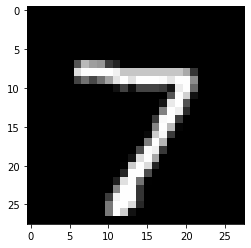

In [9]:
array = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.9450980392156862, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.6666666666666666, 0.20392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2627450980392157, 0.4470588235294118, 0.2823529411764706, 0.4470588235294118, 0.6392156862745098, 0.8901960784313725, 0.996078431372549, 0.8823529411764706, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.9803921568627451, 0.8980392156862745, 0.996078431372549, 0.996078431372549, 0.5490196078431373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.25882352941176473, 0.054901960784313725, 0.2627450980392157, 0.2627450980392157, 0.2627450980392157, 0.23137254901960785, 0.08235294117647059, 0.9254901960784314, 0.996078431372549, 0.41568627450980394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3254901960784314, 0.9921568627450981, 0.8196078431372549, 0.07058823529411765, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08627450980392157, 0.9137254901960784, 1.0, 0.3254901960784314, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5058823529411764, 0.996078431372549, 0.9333333333333333, 0.17254901960784313, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23137254901960785, 0.9764705882352941, 0.996078431372549, 0.24313725490196078, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5215686274509804, 0.996078431372549, 0.7333333333333333, 0.0196078431372549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529411764705882, 0.803921568627451, 0.9725490196078431, 0.22745098039215686, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.49411764705882355, 0.996078431372549, 0.7137254901960784, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29411764705882354, 0.984313725490196, 0.9411764705882353, 0.2235294117647059, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07450980392156863, 0.8666666666666667, 0.996078431372549, 0.6509803921568628, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011764705882352941, 0.796078431372549, 0.996078431372549, 0.8588235294117647, 0.13725490196078433, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14901960784313725, 0.996078431372549, 0.996078431372549, 0.30196078431372547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12156862745098039, 0.8784313725490196, 0.996078431372549, 0.45098039215686275, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5215686274509804, 0.996078431372549, 0.996078431372549, 0.20392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23921568627450981, 0.9490196078431372, 0.996078431372549, 0.996078431372549, 0.20392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4745098039215686, 0.996078431372549, 0.996078431372549, 0.8588235294117647, 0.1568627450980392, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4745098039215686, 0.996078431372549, 0.8117647058823529, 0.07058823529411765, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
plt.imshow(array, cmap='gray')
plt.show()

Then, replace the `<MODEL_DEPLOYMENT_ENDPOINT>` in the below cell with `https://.../predictions` (Endpoint value copied from deployment detail page).

In [10]:
%env ENDPOINT=<MODEL_DEPLOYMENT_ENDPOINT>

env: ENDPOINT=https://hub.a.demo.primehub.io/deployment/tf2-quickstart-1i34h/api/v1.0/predictions


Run below cell to send request to deployed model endpoint.

In [11]:
response=!curl -X POST $ENDPOINT \
    -H 'Content-Type: application/json' \
    -d '{ "data": {"ndarray": [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.9450980392156862, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.6666666666666666, 0.20392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2627450980392157, 0.4470588235294118, 0.2823529411764706, 0.4470588235294118, 0.6392156862745098, 0.8901960784313725, 0.996078431372549, 0.8823529411764706, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.9803921568627451, 0.8980392156862745, 0.996078431372549, 0.996078431372549, 0.5490196078431373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.25882352941176473, 0.054901960784313725, 0.2627450980392157, 0.2627450980392157, 0.2627450980392157, 0.23137254901960785, 0.08235294117647059, 0.9254901960784314, 0.996078431372549, 0.41568627450980394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3254901960784314, 0.9921568627450981, 0.8196078431372549, 0.07058823529411765, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08627450980392157, 0.9137254901960784, 1.0, 0.3254901960784314, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5058823529411764, 0.996078431372549, 0.9333333333333333, 0.17254901960784313, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23137254901960785, 0.9764705882352941, 0.996078431372549, 0.24313725490196078, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5215686274509804, 0.996078431372549, 0.7333333333333333, 0.0196078431372549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529411764705882, 0.803921568627451, 0.9725490196078431, 0.22745098039215686, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.49411764705882355, 0.996078431372549, 0.7137254901960784, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29411764705882354, 0.984313725490196, 0.9411764705882353, 0.2235294117647059, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07450980392156863, 0.8666666666666667, 0.996078431372549, 0.6509803921568628, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011764705882352941, 0.796078431372549, 0.996078431372549, 0.8588235294117647, 0.13725490196078433, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14901960784313725, 0.996078431372549, 0.996078431372549, 0.30196078431372547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12156862745098039, 0.8784313725490196, 0.996078431372549, 0.45098039215686275, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5215686274509804, 0.996078431372549, 0.996078431372549, 0.20392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23921568627450981, 0.9490196078431372, 0.996078431372549, 0.996078431372549, 0.20392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4745098039215686, 0.996078431372549, 0.996078431372549, 0.8588235294117647, 0.1568627450980392, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4745098039215686, 0.996078431372549, 0.8117647058823529, 0.07058823529411765, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]] } }'

In the following cells, we will parse the model response to find the highest prediction probability.

In [12]:
result = json.loads(response[-1])

Print out response data.

In [13]:
result

{'data': {'names': ['t:0',
   't:1',
   't:2',
   't:3',
   't:4',
   't:5',
   't:6',
   't:7',
   't:8',
   't:9'],
  'ndarray': [[2.1059291810399117e-10,
    1.1047092636550047e-15,
    5.745229181286504e-09,
    6.245172130547871e-07,
    2.9187489048127045e-15,
    5.732042011180605e-12,
    7.638011075769286e-16,
    0.9999994039535522,
    1.9503761106154371e-10,
    2.015757560869247e-09]]},
 'meta': {'requestPath': {'model': 'infuseai/tensorflow2-prepackaged:v0.2.0'}}}

In [14]:
print(f"The model predicts the number is {np.argmax(result['data']['ndarray'][0])}")

The model predicts the number is 7


We have versioned our trained model and further deploy it as an endpoint service that can respond to requests anytime from everywhere!

## 5. (Advanced) Use PrimeHub <a target="_blank" href="https://github.com/InfuseAI/primehub-python-sdk">Python SDK</a> to deploy the trained model

In addition to deploy the trained model via PrimeHub UI, we can simply use PrimeHub `Python SDK` to perform the same operations.

Let's install PrimeHub Python SDK with pip.

In [15]:
!pip install primehub-python-sdk

After installed, the SDK needs a configuration file stored in the `~/.primehub/config.json`.

Hence, back to PrimeHub UI and select `API Token` from the upper-right menu.

<img src="img/mlflow/5-1-menu.png"/>

In the `API Token` page, click on the `Request API Token` button.

<img src="img/mlflow/5-2-request-api-token.png"/>

After the token is granted, we can click on the `Download Config` button to save the `config.json` file locally.

<img src="img/mlflow/5-3-download-config.png"/>

Next, uploading the downloaded `config.json` file and moving it to the `~/.primehub/config.json`.

Verify configration with PrimeHub Python SDK.

In [16]:
import random, string
from primehub import PrimeHub, PrimeHubConfig
ph = PrimeHub(PrimeHubConfig())

if ph.is_ready():
    print("PrimeHub Python SDK setup successfully")
else:
    print("PrimeHub Python SDK couldn't get the information, please ensure your configuration is stored in the ~/.primehub/config.json")

PrimeHub Python SDK setup successfully


We can refer to <a target="_blank" href="https://github.com/InfuseAI/primehub-python-sdk/blob/main/docs/notebook/deployments.ipynb">Deployments command</a> to find out more useful manipulations of PrimeHub Python SDK.

List all deployments.

In [17]:
ph.deployments.list()

[{'id': 'tf2-quickstart-1i34h',
  'name': 'tf2-quickstart',
  'modelImage': 'infuseai/tensorflow2-prepackaged:v0.2.0',
  'imagePullSecret': None,
  'description': None,
  'replicas': 1,
  'stop': False,
  'endpointAccessType': 'public',
  'endpointClients': [],
  'status': 'Deployed',
  'endpoint': 'https://hub.a.demo.primehub.io/deployment/tf2-quickstart-1i34h/api/v1.0/predictions',
  'availableReplicas': 1,
  'message': 'Deployment is deployed and available now',
  'pods': [{'name': 'deploy-tf2-quickstart-1i34h-7fd564bcbb-pz89f'}]}]

Delete the `tf2-quickstart` deployment that we created early.

In [18]:
ph.deployments.delete(ph.deployments.list()[0]["id"])

{'id': 'tf2-quickstart-1i34h'}

Create a new deployment by specifing its config information:
- `id`: the prefix of tf2-sdk-quickstart along with random string
- `name`: tf2-sdk-quickstart
- `modelImage`: a pre-packaged model server image that can serve TensorFlow 2 model
- `modelURI`: the trained model logged in MLflow server
- `instanceType`: cpu-1 (CPU: 1 / Memory: 2G / GPU: 0)
- `replicas`: 1

In [19]:
config = {
    "id": f"tf2-sdk-quickstart-{''.join(random.choice(string.ascii_lowercase + string.digits) for _ in range(5))}",
    "name": "tf2-sdk-quickstart",
    "modelImage": "infuseai/tensorflow2-prepackaged:v0.2.0",
    "modelURI": "models:/tf2-quickstart/1",
    "instanceType": "cpu-1",
    "replicas": 1
}

deployment = ph.deployments.create(config)
print(deployment)

{'id': 'tf2-sdk-quickstart-a0e2v', 'name': 'tf2-sdk-quickstart', 'modelImage': 'infuseai/tensorflow2-prepackaged:v0.2.0', 'imagePullSecret': None, 'description': None, 'replicas': 1, 'stop': False, 'endpointAccessType': 'public', 'endpointClients': [], 'status': 'Deploying', 'endpoint': None, 'availableReplicas': None, 'message': None, 'pods': []}


Keep waiting until deployed.

In [20]:
ph.deployments.wait(deployment["id"])

{'id': 'tf2-sdk-quickstart-a0e2v',
 'name': 'tf2-sdk-quickstart',
 'modelImage': 'infuseai/tensorflow2-prepackaged:v0.2.0',
 'imagePullSecret': None,
 'description': None,
 'replicas': 1,
 'stop': False,
 'endpointAccessType': 'public',
 'endpointClients': [],
 'status': 'Deployed',
 'endpoint': 'https://hub.a.demo.primehub.io/deployment/tf2-sdk-quickstart-a0e2v/api/v1.0/predictions',
 'availableReplicas': 1,
 'message': 'Deployment is deployed and available now',
 'pods': [{'name': 'deploy-tf2-sdk-quickstart-a0e2v-56bc847747-fgnck'}]}

After deployed, parsing the deployment endpoint.

In [21]:
endpoint = ph.deployments.get(deployment["id"])["endpoint"]
%env ENDPOINT=$endpoint

env: ENDPOINT=https://hub.a.demo.primehub.io/deployment/tf2-sdk-quickstart-a0e2v/api/v1.0/predictions


Run below cell to send request to deployed model endpoint.

In [22]:
response=!curl -X POST $ENDPOINT \
    -H 'Content-Type: application/json' \
    -d '{ "data": {"ndarray": [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.9450980392156862, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.7764705882352941, 0.6666666666666666, 0.20392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2627450980392157, 0.4470588235294118, 0.2823529411764706, 0.4470588235294118, 0.6392156862745098, 0.8901960784313725, 0.996078431372549, 0.8823529411764706, 0.996078431372549, 0.996078431372549, 0.996078431372549, 0.9803921568627451, 0.8980392156862745, 0.996078431372549, 0.996078431372549, 0.5490196078431373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.25882352941176473, 0.054901960784313725, 0.2627450980392157, 0.2627450980392157, 0.2627450980392157, 0.23137254901960785, 0.08235294117647059, 0.9254901960784314, 0.996078431372549, 0.41568627450980394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3254901960784314, 0.9921568627450981, 0.8196078431372549, 0.07058823529411765, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08627450980392157, 0.9137254901960784, 1.0, 0.3254901960784314, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5058823529411764, 0.996078431372549, 0.9333333333333333, 0.17254901960784313, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23137254901960785, 0.9764705882352941, 0.996078431372549, 0.24313725490196078, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5215686274509804, 0.996078431372549, 0.7333333333333333, 0.0196078431372549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529411764705882, 0.803921568627451, 0.9725490196078431, 0.22745098039215686, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.49411764705882355, 0.996078431372549, 0.7137254901960784, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29411764705882354, 0.984313725490196, 0.9411764705882353, 0.2235294117647059, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07450980392156863, 0.8666666666666667, 0.996078431372549, 0.6509803921568628, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011764705882352941, 0.796078431372549, 0.996078431372549, 0.8588235294117647, 0.13725490196078433, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14901960784313725, 0.996078431372549, 0.996078431372549, 0.30196078431372547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12156862745098039, 0.8784313725490196, 0.996078431372549, 0.45098039215686275, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5215686274509804, 0.996078431372549, 0.996078431372549, 0.20392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23921568627450981, 0.9490196078431372, 0.996078431372549, 0.996078431372549, 0.20392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4745098039215686, 0.996078431372549, 0.996078431372549, 0.8588235294117647, 0.1568627450980392, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4745098039215686, 0.996078431372549, 0.8117647058823529, 0.07058823529411765, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]] } }'

In the following cells, we will parse the model response to find the highest prediction probability.

In [23]:
result = json.loads(response[-1])

Print out response data.

In [24]:
result

{'data': {'names': ['t:0',
   't:1',
   't:2',
   't:3',
   't:4',
   't:5',
   't:6',
   't:7',
   't:8',
   't:9'],
  'ndarray': [[2.1059291810399117e-10,
    1.1047092636550047e-15,
    5.745229181286504e-09,
    6.245172130547871e-07,
    2.9187489048127045e-15,
    5.732042011180605e-12,
    7.638011075769286e-16,
    0.9999994039535522,
    1.9503761106154371e-10,
    2.015757560869247e-09]]},
 'meta': {'requestPath': {'model': 'infuseai/tensorflow2-prepackaged:v0.2.0'}}}

In [25]:
print(f"The model predicts the number is {np.argmax(result['data']['ndarray'][0])}")

The model predicts the number is 7


Congratulations! We have efficiently deployed our model via PrimeHub Python SDK!

In the last, we can delete our deployment to ensure no resources will be wasted after this quickstart tutorial!

In [26]:
ph.deployments.delete(deployment["id"])

{'id': 'tf2-sdk-quickstart-a0e2v'}